# POC to determine top key words in stories using TF-IDF

In [3]:
#Import required libraries
import nltk
import pandas as pd

In [27]:
from nltk.corpus import RegexpTokenizer as regextoken
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

In [4]:
#Load the merged file
storycontentdata = pd.read_csv("stories_content.csv")

In [11]:
storycontentdata.shape

(7880, 17)

In [15]:
#Filter english stories
englishstories = storycontentdata[storycontentdata["language_name"] == "English"]

In [17]:
englishstories.head()

,story_id,story_title,story_english_title,is_child_created_story,stories_status,stories_summary,ancestry,is_recommended_story,reads,language_name,organization_name,page_id,page_type,story_derivation_type,story_publishing_type,reading_level_cat,story_content
1,2,Smile Please!,Smile Please!,f,1,Follow the young deer as he races along with f...,1,t,13368,English,Pratham Books,16,StoryPage,Translated,Publisher Story,Level 1,A fawn was racing in the forest.He was ahead o...
5,7,Fat King Thin Dog,Fat King Thin Dog,f,1,Run along with the Fat King after the Thin Dog!,NaN,t,17504,English,Pratham Books,88,StoryPage,original,Publisher Story,Level 1,This is a fat king.The fat king has a thin dog...
14,16,"Vayu, the Wind","Vayu, the Wind",f,1,A nice story about this silent and always pres...,15,t,361,English,Pratham Books,179,StoryPage,Translated,Publisher Story,Level 2,"Everytime I finish my hot, hot bath,My wet bod..."
16,21,Chuskit Goes to School!,Chuskit Goes to School!,f,1,"Nine year old Chuskit longed to go to school, ...",NaN,t,2391,English,Pratham Books,250,StoryPage,original,Publisher Story,Level 3,Chuskit woke up early that morning. It was a v...
18,33,"Not Now, Not Now!","Not Now, Not Now!",f,1,The little boy in this story wants to do somet...,NaN,t,1850,English,Pratham Books,405,StoryPage,original,Publisher Story,Level 1,"I asked Ajji, “May I please have some laddoos..."


In [18]:
englishstories.shape

(1889, 17)

## Explore with first english story to determine top words 

In [107]:
#Get first story content
contentstory1 = englishstories.story_content[1]

In [108]:
contentstory1

"A fawn was racing in the forest.He was ahead of the rabbit.He was ahead of the elephant.He leapt and cleared the stream.He ran past the crumbling wall.There was a large boulder on the grassy plain. He stumbled and fell down.He burst into tears.The monkey massaged his leg. Tears flowed from the fawn's eyes.Brother Bear picked him up. The fawn didn't stop crying.His mother came. She said, “Look, we’ll beat up this bad boulder!”\u2029The fawn said, “Oh, don’t do that or he will also start crying.” His mother laughed. So did the fawn.\u2029"

In [24]:
len(contentstory1)

532

In [26]:
#Tokenize the first story
tokens = nltk.tokenize.word_tokenize(contentstory1)
print(tokens)

['A', 'fawn', 'was', 'racing', 'in', 'the', 'forest.He', 'was', 'ahead', 'of', 'the', 'rabbit.He', 'was', 'ahead', 'of', 'the', 'elephant.He', 'leapt', 'and', 'cleared', 'the', 'stream.He', 'ran', 'past', 'the', 'crumbling', 'wall.There', 'was', 'a', 'large', 'boulder', 'on', 'the', 'grassy', 'plain', '.', 'He', 'stumbled', 'and', 'fell', 'down.He', 'burst', 'into', 'tears.The', 'monkey', 'massaged', 'his', 'leg', '.', 'Tears', 'flowed', 'from', 'the', 'fawn', "'s", 'eyes.Brother', 'Bear', 'picked', 'him', 'up', '.', 'The', 'fawn', 'did', "n't", 'stop', 'crying.His', 'mother', 'came', '.', 'She', 'said', ',', '“', 'Look', ',', 'we', '’', 'll', 'beat', 'up', 'this', 'bad', 'boulder', '!', '”', 'The', 'fawn', 'said', ',', '“', 'Oh', ',', 'don', '’', 't', 'do', 'that', 'or', 'he', 'will', 'also', 'start', 'crying.', '”', 'His', 'mother', 'laughed', '.', 'So', 'did', 'the', 'fawn', '.']


In [28]:
#Tokenize first story using RegexpTokenizer
from nltk.corpus import RegexpTokenizer as regextoken
tokenizer = regextoken(r'\w+')
tokens = tokenizer.tokenize(contentstory1)
print(tokens[:20])

['A', 'fawn', 'was', 'racing', 'in', 'the', 'forest', 'He', 'was', 'ahead', 'of', 'the', 'rabbit', 'He', 'was', 'ahead', 'of', 'the', 'elephant', 'He']


In [29]:
#Convert tokens to lower case
tokens = [token.lower() for token in tokens] # Converting list of token to lower case
print(tokens[:20])

['a', 'fawn', 'was', 'racing', 'in', 'the', 'forest', 'he', 'was', 'ahead', 'of', 'the', 'rabbit', 'he', 'was', 'ahead', 'of', 'the', 'elephant', 'he']


In [30]:
#Remove English stopwords
from nltk.corpus import stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [31]:
stop = stopwords.words('english')
tokens = [token for token in tokens if token not in stop]
print(tokens[:20])

['fawn', 'racing', 'forest', 'ahead', 'rabbit', 'ahead', 'elephant', 'leapt', 'cleared', 'stream', 'ran', 'past', 'crumbling', 'wall', 'large', 'boulder', 'grassy', 'plain', 'stumbled', 'fell']


In [37]:
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
#Lemmatize tags
lmtzr = WordNetLemmatizer()
tokens = [lmtzr.lemmatize(token) for token in tokens]
print(tokens[:20])

['fawn', 'racing', 'forest', 'ahead', 'rabbit', 'ahead', 'elephant', 'leapt', 'cleared', 'stream', 'ran', 'past', 'crumbling', 'wall', 'large', 'boulder', 'grassy', 'plain', 'stumbled', 'fell']


In [34]:
from collections import Counter

In [36]:
#Determine most frequently occuring tokens in the first story
count = Counter(tokens)
print(count.most_common(10))

[('fawn', 5), ('ahead', 2), ('boulder', 2), ('tear', 2), ('cry', 2), ('mother', 2), ('said', 2), ('racing', 1), ('forest', 1), ('rabbit', 1)]


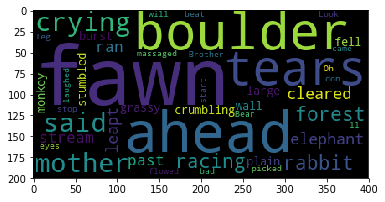

In [39]:
#Create a word cloud for first story
from wordcloud import WordCloud
wordcloud = WordCloud().generate(contentstory1)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(wordcloud)

## Use custom function to determine tf/idf for tokens in first 3 english stories

In [123]:
import math
from textblob import TextBlob as tb
#Determine term frequency of words
def tf(word, blob):
    return blob.words.count(word) / len(blob.words)

def n_containing(word, bloblist):
    return sum(1 for blob in bloblist if word in blob.words)
#Determine inverse document frequency of words
def idf(word, bloblist):
    return math.log(len(bloblist) / (1 + n_containing(word, bloblist)))
#Compute tf-idf
def tfidf(word, blob, bloblist):
    return tf(word, blob) * idf(word, bloblist)

In [124]:
#Get content of first 3 english stories
document1 = tb(englishstories.story_content[1])
document2 = tb(englishstories.story_content[5])
document3 = tb(englishstories.story_content[14])      

In [125]:
#Create a bloblist of the 3 stories
#Determine tf-idf within this corpus
bloblist = [document1, document2, document3]
for i, blob in enumerate(bloblist):
    print("Top words in document {}".format(i + 1))
    scores = {word: tfidf(word, blob, bloblist) for word in blob.words}
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for word, score in sorted_words[:3]:
        print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))

Top words in document 1
	Word: fawn, TF-IDF: 0.01968
	Word: ahead, TF-IDF: 0.00787
	Word: boulder, TF-IDF: 0.00787
Top words in document 2
	Word: king, TF-IDF: 0.03825
	Word: fat, TF-IDF: 0.0306
	Word: thin, TF-IDF: 0.02295
Top words in document 3
	Word: Wind, TF-IDF: 0.02278
	Word: wind, TF-IDF: 0.02278
	Word: Vayu, TF-IDF: 0.0205
